In [1]:
import os
import shutil
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
urban_data_folder = os.path.join(
    "D:", "Danielle", "UrbanSound.tar", "UrbanSound", "data"
)

In [3]:
urban_data_folder

'D:Danielle\\UrbanSound.tar\\UrbanSound\\data'

In [4]:
all_urban_label_folders = [
    name
    for name in os.listdir(urban_data_folder)
    if os.path.isdir(os.path.join(urban_data_folder, name))
]

list_df = []
for folder in all_urban_label_folders:
    all_csv_file_names = [
        name
        for name in os.listdir(os.path.join(urban_data_folder, folder))
        if ".csv" in name
    ]
    for csv_file in all_csv_file_names:
        df = pd.read_csv(
            os.path.join(urban_data_folder, folder, csv_file),
            names=["Start", "End", "Condition", "Label"],
        )
        df["File"] = csv_file
        list_df.append(df)

df_comb = pd.concat(list_df).reset_index()

In [5]:
list_diff_time = []
for file in np.unique(df_comb["File"]):
    df_one_file = df_comb[df_comb["File"] == file].reset_index()
    if len(df_one_file) > 1:
        start_index = 1
        while start_index < len(df_one_file):
            end_index = start_index - 1
            diff_time = (
                df_one_file["Start"][start_index] - df_one_file["End"][end_index]
            )
            list_diff_time.append(diff_time)
            start_index += 1

In [6]:
list_diff_time = []
list_file_name = []
for file in np.unique(df_comb["File"]):
    df_one_file = df_comb[df_comb["File"] == file].reset_index()
    if len(df_one_file) > 1:
        start_times = np.sort(df_one_file["Start"])
        end_times = np.sort(df_one_file["End"])
        diff_time_one_file = start_times[1:] - end_times[:1]
        list_diff_time.extend(diff_time_one_file)
        list_file_name.extend([file] * len(diff_time_one_file))

In [7]:
i = np.argmin(list_diff_time)

In [8]:
list_diff_time[i]

-19.885325999999992

In [9]:
list_file_name[i]

'132016.csv'

In [10]:
df_one_file = df_comb[df_comb["File"]==list_file_name[i]].reset_index()

In [11]:
df_one_file

,level_0,index,Start,End,Condition,Label,File
0,2385,0,76.564653,96.705306,2,jackhammer,132016.csv
1,2899,0,46.661108,96.449979,2,street_music,132016.csv


In [12]:
list_diff_time = []
list_file_name = []
for file in np.unique(df_comb["File"]):
    df_one_file = df_comb[df_comb["File"]==file].reset_index()
    for label in np.unique(df_one_file["Label"]):
        df_one_label = df_one_file[df_one_file["Label"]==label]
        if len(df_one_label) > 1:
            start_times = np.sort(df_one_label["Start"])
            end_times = np.sort(df_one_label["End"])
            diff_time_one_label = start_times[1:] - end_times[:1]
            list_diff_time.extend(diff_time_one_label)
            list_file_name.extend([file]*len(diff_time_one_label))

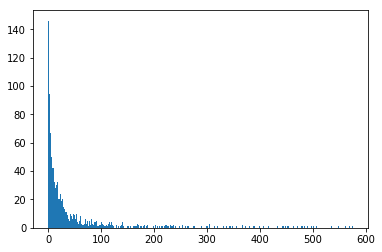

In [13]:
plt.figure()
plt.hist(list_diff_time,bins=int(np.floor(np.max(list_diff_time))))
plt.show()

In [14]:
array_diff_time = np.array(list_diff_time)

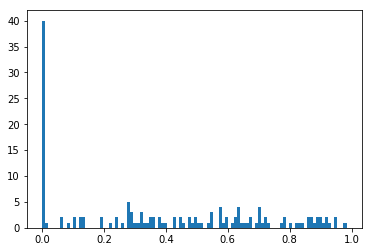

In [15]:
plt.figure()
plt.hist(array_diff_time[array_diff_time < 1],bins=100)
plt.show()

In [22]:
path_urban_data_folder = os.getcwd()
example_urban_data_folder = os.path.join(
    path_urban_data_folder, "data", "ExampleUrbanSound", "data"
)
if not os.path.isdir(example_urban_data_folder):
    os.makedirs(example_urban_data_folder)

In [23]:
seed = 0
np.random.seed(seed)
example_file_name_list = ["132016.csv"]

for label in np.unique(df_comb["Label"]):
    for cond in np.unique(df_comb["Condition"]):
        df_one_type = df_comb[
            (df_comb["Label"] == label) & (df_comb["Condition"] == cond)
        ].reset_index()
        sel_index = np.random.randint(0, len(df_one_type) - 1)
        example_file_name_list.append(df_one_type["File"][sel_index])

In [24]:
list_example_file_paths = []
path = urban_data_folder
for example_file_name in example_file_name_list:
    for root, dirs, files in os.walk(path):
        for file in files:
            if example_file_name.split(".")[0] in file:
                list_example_file_paths.append(os.path.join(root, file))

In [25]:
file_path = list_example_file_paths[0]

In [27]:
for file_path in list_example_file_paths:
    folders, file_name = os.path.split(file_path)
    parent_folder, child_folder = os.path.split(folders)
    dst_folder = os.path.join(example_urban_data_folder,child_folder)
    if not os.path.isdir(dst_folder):
        os.makedirs(dst_folder)
    dst = os.path.join(dst_folder, file_name)
    src = file_path
    shutil.copyfile(src, dst)

In [28]:
urban_data_folder = example_urban_data_folder

In [29]:
all_urban_label_folders = [
    name
    for name in os.listdir(urban_data_folder)
    if os.path.isdir(os.path.join(urban_data_folder, name))
]

list_df = []
for folder in all_urban_label_folders:
    all_csv_file_names = [
        name
        for name in os.listdir(os.path.join(urban_data_folder, folder))
        if ".csv" in name
    ]
    for csv_file in all_csv_file_names:
        df = pd.read_csv(
            os.path.join(urban_data_folder, folder, csv_file),
            names=["Start", "End", "Condition", "Label"],
        )
        df["File"] = csv_file
        list_df.append(df)
        
df_comb = pd.concat(list_df).reset_index()

In [39]:
list_diff_time = []
list_file_name = []
for file in np.unique(df_comb["File"]):
    df_one_file = df_comb[df_comb["File"]==file].reset_index()
    for label in np.unique(df_one_file["Label"]):
        df_one_label = df_one_file[df_one_file["Label"]==label]
        if len(df_one_label) > 1:
            start_times = np.sort(df_one_label["Start"])
            end_times = np.sort(df_one_label["End"])
            diff_time_one_label = start_times[1:] - end_times[:1]
            list_diff_time.extend(diff_time_one_label)
            list_file_name.extend([file]*len(diff_time_one_label))
            
print(np.min(list_diff_time))
print(list_file_name[np.argmin(list_diff_time)])
print(np.max(list_diff_time))
print(list_file_name[np.argmax(list_diff_time)])

0.0
105289.csv
500.90122199999996
209992.csv


In [32]:
df_comb['Audacity_Label'] = "C" + df_comb['Condition'].astype(str) + "-" + df_comb['Label']

In [31]:
list_audacity_file_paths = []
path = example_urban_data_folder
for example_file_name in example_file_name_list:
    for root, dirs, files in os.walk(path):
        for file in files:
            if example_file_name.split(".")[0] in file and ".csv" not in file:
                list_audacity_file_paths.append(os.path.join(root, file))

In [34]:
current_path = os.getcwd()
for_audacity_urban_data_folder = os.path.join(current_path,"data","derivatives","ExampleUrbanSound4Audacity","data")
if not os.path.isdir(for_audacity_urban_data_folder):
    os.makedirs(for_audacity_urban_data_folder)

In [35]:
dst_folder = for_audacity_urban_data_folder
for file_path in list_audacity_file_paths:
    folders, file_name = os.path.split(file_path)
    if not os.path.isdir(dst_folder):
        os.makedirs(dst_folder)
    dst = os.path.join(dst_folder, file_name)
    src = file_path
    shutil.copyfile(src, dst)

In [37]:
for file in np.unique(df_comb["File"]):
    df_one_file = df_comb[df_comb["File"]==file].reset_index()
    df_for_audacity = df_one_file.loc[:,["Start","End","Audacity_Label"]]
    txt_file_name = file.split(".")[0] + "_labels.txt"
    txt_file_path = os.path.join(for_audacity_urban_data_folder, txt_file_name)
    df_for_audacity.to_csv(txt_file_path, sep="\t", header=None, index=None)